In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 8
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
pd.options.display.max_columns = 100

In [23]:
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.grid_search import GridSearchCV

In [3]:
df=pd.read_csv("parsed_df/parsed_df.csv")

In [4]:
df.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,PERIOD_x,PERSON1TYPE,PERSON2TYPE,PERSON3TYPE,PLAYER2_ID,PLAYER3_ID,SCOREMARGIN,WCTIMESTRING,HOME_TEAM_ID,AWAY_TEAM_ID,HOME_PLAYER1_ID,HOME_PLAYER2_ID,HOME_PLAYER3_ID,HOME_PLAYER4_ID,HOME_PLAYER5_ID,AWAY_PLAYER1_ID,AWAY_PLAYER2_ID,AWAY_PLAYER3_ID,AWAY_PLAYER4_ID,AWAY_PLAYER5_ID,ACTION_BEFORE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,DRIBBLES,FINAL_MARGIN,LOCATION,PTS,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,SHOT_RESULT,TOUCH_TIME,W,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,ACTION_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
0,0,1,2,2,21300001,1,4,0,0,0,0,0,7:12 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,10,101131,1.6,2,10,1,0,2,6.7,7.4,1,missed,7.8,True,2,2561,1610612754,Jump Shot,In The Paint (Non-RA),Center(C),Less Than 8 ft.,5,-38,45,0,81,79,699,2859
1,1,79,1,5,21300001,1,4,0,0,0,0,2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,6,203090,4.1,1,10,1,2,2,16.8,19.3,1,made,3.2,True,5,202331,1610612754,Pullup Jump shot,Mid-Range,Right Side Center(RC),16-24 ft.,19,105,164,1,81,81,690,2850
2,2,1,2,6,21300001,1,5,0,0,0,0,-2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,1,202331,4.4,0,-10,0,0,3,13.0,24.5,1,missed,0.7,False,6,201167,1610612753,Jump Shot,Above the Break 3,Center(C),24+ ft.,27,51,266,0,77,81,675,2835
3,3,5,2,8,21300001,1,4,0,5,0,101131,2,7:13 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,4,101131,0.4,0,10,1,0,2,13.8,1.4,2,missed,1.8,True,8,2561,1610612754,Layup Shot,Restricted Area,Center(C),Less Than 8 ft.,2,28,-5,0,81,79,663,2823
4,4,1,1,11,21300001,1,4,4,0,2561,0,5,7:14 PM,1610612754,1610612753,2561,201579,201588,202331,202362,2749,101131,201167,202696,203090,5,2749,5.7,0,10,1,3,3,15.6,25.1,1,made,0.7,True,11,202362,1610612754,Jump Shot,Above the Break 3,Center(C),24+ ft.,26,15,260,1,77,72,651,2811


In [5]:
dftouse=df.copy()
dftouse=dftouse.dropna()
dftouse=dftouse.sample(20000, replace=False)
del dftouse['Unnamed: 0']
del dftouse['EVENTMSGACTIONTYPE']
del dftouse['WCTIMESTRING']
del dftouse['SHOT_RESULT']
del dftouse['ACTION_TYPE']
del dftouse['SHOT_ZONE_BASIC']
del dftouse['SHOT_ZONE_AREA']
del dftouse['SHOT_ZONE_RANGE']
del dftouse['PERSON1TYPE']
del dftouse['TEAM_ID']
del dftouse['GAME_ID']
del dftouse['SHOT_DISTANCE']
del dftouse['HOME_TEAM_ID']
del dftouse['AWAY_TEAM_ID']
del dftouse['HOME_PLAYER1_ID']
del dftouse['HOME_PLAYER2_ID']
del dftouse['HOME_PLAYER3_ID']
del dftouse['HOME_PLAYER4_ID']
del dftouse['HOME_PLAYER5_ID']
del dftouse['AWAY_PLAYER1_ID']
del dftouse['AWAY_PLAYER2_ID']
del dftouse['AWAY_PLAYER3_ID']
del dftouse['AWAY_PLAYER4_ID']
del dftouse['AWAY_PLAYER5_ID']
del dftouse['PTS']
del dftouse['W']
del dftouse['PERSON3TYPE']
del dftouse['CLOSEST_DEFENDER_PLAYER_ID']
del dftouse['PLAYER3_ID']
del dftouse['PLAYER2_ID']
del dftouse['EVENTMSGTYPE']
del dftouse['FINAL_MARGIN']
del dftouse['PERIOD_x']
dftouse.head()

,EVENTNUM,PERSON2TYPE,SCOREMARGIN,ACTION_BEFORE,CLOSE_DEF_DIST,DRIBBLES,LOCATION,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,TOUCH_TIME,GAME_EVENT_ID,PLAYER_ID,LOC_X,LOC_Y,SHOT_MADE_FLAG,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
258228,50,0,-14,3,2.4,1,0,2,8.8,5.6,2,1.7,50,201941,4,52,0,82,86,359,2519
255220,424,0,1,1,4.2,0,1,2,12.9,19.0,5,0.8,424,101123,-76,156,0,79,77,396,396
96324,39,0,7,4,4.3,0,0,2,14.2,16.3,2,0.7,39,1717,125,142,0,84,83,479,2639
297682,259,5,3,4,4.5,1,0,2,14.5,19.5,10,1.3,259,2736,-182,33,1,81,80,87,1527
398911,302,4,1,6,2.8,0,1,2,15.4,0.8,7,0.6,302,2561,1,1,1,81,82,338,1058


In [6]:
#drop all rows with NaN values
dftouse = dftouse.dropna()
dftouse.shape

(20000, 21)

In [7]:
cols = list(dftouse)
cols.insert(0, cols.pop(cols.index('SHOT_MADE_FLAG')))
dftouse = dftouse.ix[:, cols]
dftouse.head()

,SHOT_MADE_FLAG,EVENTNUM,PERSON2TYPE,SCOREMARGIN,ACTION_BEFORE,CLOSE_DEF_DIST,DRIBBLES,LOCATION,PTS_TYPE,SHOT_CLOCK,SHOT_DIST,SHOT_NUMBER,TOUCH_TIME,GAME_EVENT_ID,PLAYER_ID,LOC_X,LOC_Y,off_height,def_height,SEC_LEFT_Q,SEC_LEFT_G
258228,0,50,0,-14,3,2.4,1,0,2,8.8,5.6,2,1.7,50,201941,4,52,82,86,359,2519
255220,0,424,0,1,1,4.2,0,1,2,12.9,19.0,5,0.8,424,101123,-76,156,79,77,396,396
96324,0,39,0,7,4,4.3,0,0,2,14.2,16.3,2,0.7,39,1717,125,142,84,83,479,2639
297682,1,259,5,3,4,4.5,1,0,2,14.5,19.5,10,1.3,259,2736,-182,33,81,80,87,1527
398911,1,302,4,1,6,2.8,0,1,2,15.4,0.8,7,0.6,302,2561,1,1,81,82,338,1058


In [8]:
dftouse.shape

(20000, 21)

In [9]:
#dftouse.isnull().sum()

In [10]:
#dftouse.isnull().any()

In [11]:
Xnames = list(dftouse.columns.values[1:22])

In [12]:
Xnames

['EVENTNUM',
 'PERSON2TYPE',
 'SCOREMARGIN',
 'ACTION_BEFORE',
 'CLOSE_DEF_DIST',
 'DRIBBLES',
 'LOCATION',
 'PTS_TYPE',
 'SHOT_CLOCK',
 'SHOT_DIST',
 'SHOT_NUMBER',
 'TOUCH_TIME',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'LOC_X',
 'LOC_Y',
 'off_height',
 'def_height',
 'SEC_LEFT_Q',
 'SEC_LEFT_G']

In [13]:
Xnames.remove("PERSON2TYPE")

In [14]:
#create train and test set
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [15]:
dftouse.shape[0]

20000

In [41]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        try:
            gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
        except:
            gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=make_scorer(score_func))
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    y_=indf[targetname]
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

clfForest = RandomForestClassifier()

parameters = {
    "n_estimators" : [10,50,100,500],
    #"n_estimators" : range(1, 21),
#    "max_features" : range(10,len(Xnames+1),2)
    "max_depth": [50,100,200,400],
#    "bootstrap": [True, False]
}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, dftouse, Xnames, 'SHOT_MADE_FLAG', 1, mask=mask, n_folds = 5, n_jobs = 4, score_func='accuracy')

using mask


/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


BEST {'n_estimators': 500, 'max_depth': 100} 0.635642857143 [mean: 0.60064, std: 0.00741, params: {'n_estimators': 10, 'max_depth': 50}, mean: 0.62200, std: 0.00821, params: {'n_estimators': 50, 'max_depth': 50}, mean: 0.62829, std: 0.00667, params: {'n_estimators': 100, 'max_depth': 50}, mean: 0.63479, std: 0.00595, params: {'n_estimators': 500, 'max_depth': 50}, mean: 0.59764, std: 0.00561, params: {'n_estimators': 10, 'max_depth': 100}, mean: 0.62107, std: 0.00638, params: {'n_estimators': 50, 'max_depth': 100}, mean: 0.62607, std: 0.00931, params: {'n_estimators': 100, 'max_depth': 100}, mean: 0.63564, std: 0.01053, params: {'n_estimators': 500, 'max_depth': 100}, mean: 0.60336, std: 0.00364, params: {'n_estimators': 10, 'max_depth': 200}, mean: 0.62486, std: 0.00633, params: {'n_estimators': 50, 'max_depth': 200}, mean: 0.62964, std: 0.00550, params: {'n_estimators': 100, 'max_depth': 200}, mean: 0.63443, std: 0.00823, params: {'n_estimators': 500, 'max_depth': 200}, mean: 0.60064

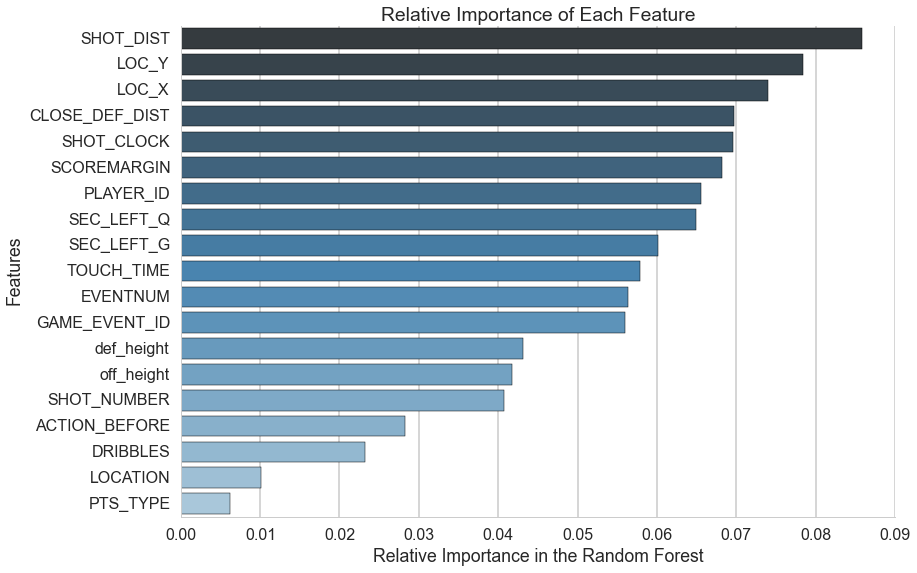

In [19]:
importance_list = clfForest.feature_importances_
name_list = dftouse.columns
importance_list, name_list = zip(*sorted(zip(importance_list, Xnames)))
ax = sns.barplot(y=range(len(name_list)),x=list(reversed(importance_list)), orient='h', palette="Blues_d")
ax.set_xlabel('Relative Importance in the Random Forest')
ax.set_ylabel('Features')
ax.set_title('Relative Importance of Each Feature')
ax.set_yticklabels(list(reversed(name_list)));
sns.despine()
plt.savefig('Baseline Relative Importance.png')
#plt.yticks(range(len(name_list)),name_list)
#plt.xlabel('Relative Importance in the Random Forest')
#plt.ylabel('Features')
#plt.title('Relative Importance of Each Feature')
#plt.show()

In [37]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score

In [43]:
%%time

parameters = {
#    "n_estimators" : [10,50,100,500],
#    "max_depth": [50,100,200,400],
    "penalty" : ["l1", "l2"],
    "C" : [.01, .1, 1, 10, 100]
    
    
}

model = {
    #"RF" :  RandomForestClassifier(),
    "Ridge" : LinearSVC()
    #"SVM" : something
    #"Logistic" : LogisticRegression()
}
clf, Xtrain, ytrain, Xtest, ytest = do_classify(model.values().pop(), parameters, dftouse, Xnames, 'SHOT_MADE_FLAG', 1, mask=mask, n_folds = 5, n_jobs = 4, score_func=make_scorer(f1_score()))

using mask


/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x101bd3b30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/raymo...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x101bd3b30, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/raymo...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    384     def start(self):
    385         if self.poller is not None:
    386             self.poller.start()
    387         self.kernel.start()
    388         try:
--> 389             ioloop.IOLoop.instance().start()
    390         except KeyboardInterrupt:
    391             pass
    392 
    393 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    861                 self._events.update(event_pairs)
    862                 while self._events:
    863                     fd, events = self._events.popitem()
    864                     try:
    865                         fd_obj, handler_func = self._handlers[fd]
--> 866                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    867                     except (OSError, IOError) as e:
    868                         if errno_from_exception(e) == errno.EPIPE:
    869                             # Happens when the client closes the connection
    870                             pass

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    247         if self.control_stream:
    248             self.control_stream.on_recv(self.dispatch_control, copy=False)
    249 
    250         def make_dispatcher(stream):
    251             def dispatcher(msg):
--> 252                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    253             return dispatcher
    254 
    255         for s in self.shell_streams:
    256             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', u'msg_type': u'execute_request', u'session': u'55024C0760F54677AB48374E3D421251', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', 'msg_type': u'execute_request', 'parent_header': {}})
    208         else:
    209             # ensure default_int_handler during handler call
    210             sig = signal(SIGINT, default_int_handler)
    211             self.log.debug("%s: %s", msg_type, msg)
    212             try:
--> 213                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['55024C0760F54677AB48374E3D421251']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', u'msg_type': u'execute_request', u'session': u'55024C0760F54677AB48374E3D421251', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', 'msg_type': u'execute_request', 'parent_header': {}}
    214             except Exception:
    215                 self.log.error("Exception in message handler:", exc_info=True)
    216             finally:
    217                 signal(SIGINT, sig)

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['55024C0760F54677AB48374E3D421251'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', u'msg_type': u'execute_request', u'session': u'55024C0760F54677AB48374E3D421251', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'E7D5CCF6E3684819B50A331F31F018C6', 'msg_type': u'execute_request', 'parent_header': {}})
    357         if not silent:
    358             self.execution_count += 1
    359             self._publish_execute_input(code, parent, self.execution_count)
    360 
    361         reply_content = self.do_execute(code, silent, store_history,
--> 362                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    363 
    364         # Flush output before sending the reply.
    365         sys.stdout.flush()
    366         sys.stderr.flush()

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")'
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'%%time\n\nparameters = {\n#    "n_estimators" ...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-43-b999e32dfffb>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])
   3011                 code = compiler(mod, cell_name, "single")
-> 3012                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x12bb802b0, file "<ipython-input-43-b999e32dfffb>", line 1>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3013                     return True
   3014 
   3015             # Flush softspace
   3016             if softspace(sys.stdout, 0):

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x12bb802b0, file "<ipython-input-43-b999e32dfffb>", line 1>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x12bb802b0, file "<ipython-input-43-b999e32dfffb>", line 1>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'get_ipython().magic(u\'matplotlib inline\')\ni...idSearchCV\npd.options.display.max_columns = 100', u'df=pd.read_csv("parsed_df/parsed_df.csv")', u'df.head()', u"dftouse=df.copy()\ndftouse=dftouse.dropna()\nd...ARGIN']\ndel dftouse['PERIOD_x']\ndftouse.head()", u'#drop all rows with NaN values\ndftouse = dftouse.dropna()\ndftouse.shape', u"cols = list(dftouse)\ncols.insert(0, cols.pop(...)\ndftouse = dftouse.ix[:, cols]\ndftouse.head()", u'dftouse.shape', u'#dftouse.isnull().sum()', u'#dftouse.isnull().any()', u'Xnames = list(dftouse.columns.values[1:22])', u'Xnames', u'Xnames.remove("PERSON2TYPE")', u"#create train and test set\nfrom sklearn.cross...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'dftouse.shape[0]', u'import sklearn\nfrom sklearn.svm import Linear...#"\n    return clf, Xtrain, ytrain, Xtest, ytest', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'name_list', u'importance_list = clfForest.feature_importance...ative Importance of Each Feature\')\n#plt.show()', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4:    Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE ...   2823  
4          72         651        2811  , 5:         EVENTNUM  PERSON2TYPE  SCOREMARGIN  ACTI...         81          82         338        1058  , 6: (20000, 21), 7:         SHOT_MADE_FLAG  EVENTNUM  PERSON2TYPE  S...         81          82         338        1058  , 8: (20000, 21), 12: ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], 15: 20000}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Ridge': <class 'sklearn.linear_model.ridge.Ridge'>, 'Xnames': ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'get_ipython().magic(u\'matplotlib inline\')\ni...idSearchCV\npd.options.display.max_columns = 100', u'df=pd.read_csv("parsed_df/parsed_df.csv")', u'df.head()', u"dftouse=df.copy()\ndftouse=dftouse.dropna()\nd...ARGIN']\ndel dftouse['PERIOD_x']\ndftouse.head()", u'#drop all rows with NaN values\ndftouse = dftouse.dropna()\ndftouse.shape', u"cols = list(dftouse)\ncols.insert(0, cols.pop(...)\ndftouse = dftouse.ix[:, cols]\ndftouse.head()", u'dftouse.shape', u'#dftouse.isnull().sum()', u'#dftouse.isnull().any()', u'Xnames = list(dftouse.columns.values[1:22])', u'Xnames', u'Xnames.remove("PERSON2TYPE")', u"#create train and test set\nfrom sklearn.cross...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'dftouse.shape[0]', u'import sklearn\nfrom sklearn.svm import Linear...#"\n    return clf, Xtrain, ytrain, Xtest, ytest', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'name_list', u'importance_list = clfForest.feature_importance...ative Importance of Each Feature\')\n#plt.show()', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4:    Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE ...   2823  
4          72         651        2811  , 5:         EVENTNUM  PERSON2TYPE  SCOREMARGIN  ACTI...         81          82         338        1058  , 6: (20000, 21), 7:         SHOT_MADE_FLAG  EVENTNUM  PERSON2TYPE  S...         81          82         338        1058  , 8: (20000, 21), 12: ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], 15: 20000}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Ridge': <class 'sklearn.linear_model.ridge.Ridge'>, 'Xnames': ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/Users/raymondcen/Desktop/CS109/Final Project/sportvu/<ipython-input-43-b999e32dfffb> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 get_ipython().run_cell_magic(u'time', u'', u'\nparameters = {\n#    "n_estimators" : [10,50,100,500],\n#    "max_depth": [50,100,200,400],\n    "penalty" : ["l1", "l2"],\n    "C" : [.01, .1, 1, 10, 100]\n    \n    \n}\n\nmodel = {\n    #"RF" :  RandomForestClassifier(),\n    "Ridge" : LinearSVC()\n    #"SVM" : something\n    #"Logistic" : LogisticRegression()\n}\nclf, Xtrain, ytrain, Xtest, ytest = do_classify(model.values().pop(), parameters, dftouse, Xnames, \'SHOT_MADE_FLAG\', 1, mask=mask, n_folds = 5, n_jobs = 4, score_func="f1")')
      7 
      8 
      9 
     10 

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name=u'time', line=u'', cell=u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")')
   2288             # This will need to be updated if the internal calling logic gets
   2289             # refactored, or else we'll be expanding the wrong variables.
   2290             stack_depth = 2
   2291             magic_arg_s = self.var_expand(line, stack_depth)
   2292             with self.builtin_trap:
-> 2293                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = u''
        cell = u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")'
   2294             return result
   2295 
   2296     def find_line_magic(self, magic_name):
   2297         """Find and return a line magic by name.

...........................................................................
/Users/raymondcen/Desktop/CS109/Final Project/sportvu/<string> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', local_ns=None)
      1 
----> 2 
      3 
      4 
      5 # -*- coding: utf-8 -*-
      6 """Implementation of execution-related magic functions."""
      7 
      8 # Copyright (c) IPython Development Team.
      9 # Distributed under the terms of the Modified BSD License.
     10 
     11 from __future__ import print_function
     12 
     13 import ast
     14 import bdb

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/magic.py in <lambda>(f=<function time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, u'', u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', None), **k={})
    188     validate_type(magic_kind)
    189 
    190     # This is a closure to capture the magic_kind.  We could also use a class,
    191     # but it's overkill for just that one bit of state.
    192     def magic_deco(arg):
--> 193         call = lambda f, *a, **k: f(*a, **k)
        f = <function time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, u'', u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', None)
        k = {}
    194 
    195         if callable(arg):
    196             # "Naked" decorator call (just @foo, no args)
    197             func = arg

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'\nparameters = {\n#    "n_estimators" : [10,50...=mask, n_folds = 5, n_jobs = 4, score_func="f1")', local_ns=None)
   1162             st = clock2()
   1163             out = eval(code, glob, local_ns)
   1164             end = clock2()
   1165         else:
   1166             st = clock2()
-> 1167             exec(code, glob, local_ns)
        code = <code object <module> at 0x12bb80830, file "<timed exec>", line 2>
        glob = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'get_ipython().magic(u\'matplotlib inline\')\ni...idSearchCV\npd.options.display.max_columns = 100', u'df=pd.read_csv("parsed_df/parsed_df.csv")', u'df.head()', u"dftouse=df.copy()\ndftouse=dftouse.dropna()\nd...ARGIN']\ndel dftouse['PERIOD_x']\ndftouse.head()", u'#drop all rows with NaN values\ndftouse = dftouse.dropna()\ndftouse.shape', u"cols = list(dftouse)\ncols.insert(0, cols.pop(...)\ndftouse = dftouse.ix[:, cols]\ndftouse.head()", u'dftouse.shape', u'#dftouse.isnull().sum()', u'#dftouse.isnull().any()', u'Xnames = list(dftouse.columns.values[1:22])', u'Xnames', u'Xnames.remove("PERSON2TYPE")', u"#create train and test set\nfrom sklearn.cross...nmask[itrain]=1\nmask[itest]=0\nmask = (mask==1)", u'dftouse.shape[0]', u'import sklearn\nfrom sklearn.svm import Linear...#"\n    return clf, Xtrain, ytrain, Xtest, ytest', u'get_ipython().run_cell_magic(u\'time\', u\'\',...= 5, n_jobs = 4, score_func=\\\'accuracy\\\')\')', u'name_list', u'importance_list = clfForest.feature_importance...ative Importance of Each Feature\')\n#plt.show()', ...], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4:    Unnamed: 0  EVENTMSGACTIONTYPE  EVENTMSGTYPE ...   2823  
4          72         651        2811  , 5:         EVENTNUM  PERSON2TYPE  SCOREMARGIN  ACTI...         81          82         338        1058  , 6: (20000, 21), 7:         SHOT_MADE_FLAG  EVENTNUM  PERSON2TYPE  S...         81          82         338        1058  , 8: (20000, 21), 12: ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], 15: 20000}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Ridge': <class 'sklearn.linear_model.ridge.Ridge'>, 'Xnames': ['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], ...}
        local_ns = None
   1168             end = clock2()
   1169             out = None
   1170         wall_end = wtime()
   1171         # Compute actual times and report

...........................................................................
/Users/raymondcen/Desktop/CS109/Final Project/sportvu/<timed exec> in <module>()
     12 
     13 
     14 
     15 
     16 
---> 17 
     18 
     19 
     20 
     21 

...........................................................................
/Users/raymondcen/Desktop/CS109/Final Project/sportvu/<ipython-input-41-042177396ade> in do_classify(clf=LinearSVC(C=1.0, class_weight=None, dual=True, f...', random_state=None, tol=0.0001,
     verbose=0), parameters={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}, indf=        SHOT_MADE_FLAG  EVENTNUM  PERSON2TYPE  S...      81        2241  

[20000 rows x 21 columns], featurenames=['EVENTNUM', 'SCOREMARGIN', 'ACTION_BEFORE', 'CLOSE_DEF_DIST', 'DRIBBLES', 'LOCATION', 'PTS_TYPE', 'SHOT_CLOCK', 'SHOT_DIST', 'SHOT_NUMBER', 'TOUCH_TIME', 'GAME_EVENT_ID', 'PLAYER_ID', 'LOC_X', 'LOC_Y', 'off_height', 'def_height', 'SEC_LEFT_Q', 'SEC_LEFT_G'], targetname='SHOT_MADE_FLAG', target1val=1, mask=array([ True,  True, ...,  True, False], dtype=bool), reuse_split=None, score_func='f1', n_folds=5, n_jobs=4)
     21         Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
     22     if reuse_split !=None:
     23         print "using reuse split"
     24         Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
     25     if parameters:
---> 26         clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
     27     clf=clf.fit(Xtrain, ytrain)
     28     training_accuracy = clf.score(Xtrain, ytrain)
     29     test_accuracy = clf.score(Xtest, ytest)
     30     print "############# based on standard predict ################"

...........................................................................
/Users/raymondcen/Desktop/CS109/Final Project/sportvu/<ipython-input-41-042177396ade> in cv_optimize(clf=LinearSVC(C=1.0, class_weight=None, dual=True, f...', random_state=None, tol=0.0001,
     verbose=0), parameters={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}, X=array([[  5.00000e+01,  -1.40000e+01, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([0, 0, ..., 0, 1]), n_jobs=4, n_folds=5, score_func='f1')
      4             gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
      5         except:
      6             gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=make_scorer(score_func))
      7     else:
      8         gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
----> 9     gs.fit(X, y)
     10     print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
     11     best = gs.best_estimator_
     12     return best
     13 

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e... score_func=None, scoring='f1',
       verbose=0), X=array([[  5.00000e+01,  -1.40000e+01, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([0, 0, ..., 0, 1]))
    727         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    728             Target relative to X for classification or regression;
    729             None for unsupervised learning.
    730 
    731         """
--> 732         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(...score_func=None, scoring='f1',
       verbose=0)>
        X = array([[  5.00000e+01,  -1.40000e+01, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]])
        y = array([0, 0, ..., 0, 1])
        self.param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    733 
    734 
    735 class RandomizedSearchCV(BaseSearchCV):
    736     """Randomized search on hyper parameters.

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e... score_func=None, scoring='f1',
       verbose=0), X=array([[  5.00000e+01,  -1.40000e+01, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([0, 0, ..., 0, 1]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    500         )(
    501             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    502                                     train, test, self.verbose, parameters,
    503                                     self.fit_params, return_parameters=True,
    504                                     error_score=self.error_score)
--> 505                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    506                 for train, test in cv)
    507 
    508         # Out is a list of triplet: score, estimator, n_test_samples
    509         n_fits = len(out)

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<itertools.islice object>)
    661             if pre_dispatch == "all" or n_jobs == 1:
    662                 # The iterable was consumed all at once by the above for loop.
    663                 # No need to wait for async callbacks to trigger to
    664                 # consumption.
    665                 self._iterating = False
--> 666             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    667             # Make sure that we get a last message telling us we are done
    668             elapsed_time = time.time() - self._start_time
    669             self._print('Done %3i out of %3i | elapsed: %s finished',
    670                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    ValueError                                         Thu Dec 10 00:36:00 2015
PID: 6224              Python 2.7.10: /Users/raymondcen/anaconda/bin/python
...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=LinearSVC(C=0.01, class_weight=None, dual=True, ...', random_state=None, tol=0.0001,
     verbose=0), X=array([[  5.00000e+01,  -1.40000e+01, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([0, 0, ..., 0, 1]), scorer=make_scorer(f1_score), train=array([ 2775,  2776, ..., 13998, 13999]), test=array([   0,    1, ..., 2823, 2824]), verbose=0, parameters={'C': 0.01, 'penalty': 'l1'}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1454 
   1455     try:
   1456         if y_train is None:
   1457             estimator.fit(X_train, **fit_params)
   1458         else:
-> 1459             estimator.fit(X_train, y_train, **fit_params)
   1460 
   1461     except Exception as e:
   1462         if error_score == 'raise':
   1463             raise

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/svm/classes.pyc in fit(self=LinearSVC(C=0.01, class_weight=None, dual=True, ...', random_state=None, tol=0.0001,
     verbose=0), X=array([[  2.92000e+02,  -1.00000e+00, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([1, 1, ..., 0, 1]))
    202 
    203         self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
    204             X, y, self.C, self.fit_intercept, self.intercept_scaling,
    205             self.class_weight, self.penalty, self.dual, self.verbose,
    206             self.max_iter, self.tol, self.random_state, self.multi_class,
--> 207             self.loss
        intercept = undefined
    208             )
    209 
    210         if self.multi_class == "crammer_singer" and len(self.classes_) == 2:
    211             self.coef_ = (self.coef_[1] - self.coef_[0]).reshape(1, -1)

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/svm/base.pyc in _fit_liblinear(X=array([[  2.92000e+02,  -1.00000e+00, ...,   3.5...3.00000e+00, ...,   3.08000e+02,   2.46800e+03]]), y=array([1, 1, ..., 0, 1]), C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, penalty='l1', dual=True, verbose=0, max_iter=1000, tol=0.0001, random_state=None, multi_class='ovr', loss='squared_hinge', epsilon=0.1)
    831     libsvm_sparse.set_verbosity_wrap(verbose)
    832     liblinear.set_verbosity_wrap(verbose)
    833 
    834     # LibLinear wants targets as doubles, even for classification
    835     y_ind = np.asarray(y_ind, dtype=np.float64).ravel()
--> 836     solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
    837     raw_coef_, n_iter_ = liblinear.train_wrap(
    838         X, y_ind, sp.isspmatrix(X), solver_type, tol, bias, C,
    839         class_weight_, max_iter, rnd.randint(np.iinfo('i').max),
    840         epsilon)

...........................................................................
/Users/raymondcen/anaconda/lib/python2.7/site-packages/sklearn/svm/base.pyc in _get_liblinear_solver_type(multi_class='ovr', penalty='l1', loss='squared_hinge', dual=True)
    693                                 % (penalty, loss, dual))
    694             else:
    695                 return solver_num
    696     raise ValueError('Unsupported set of arguments: %s, '
    697                      'Parameters: penalty=%r, loss=%r, dual=%r'
--> 698                      % (error_string, penalty, loss, dual))
    699 
    700 
    701 def _fit_liblinear(X, y, C, fit_intercept, intercept_scaling, class_weight,
    702                    penalty, dual, verbose, max_iter, tol,

ValueError: Unsupported set of arguments: loss='l1' and penalty='squared_hinge'are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
___________________________________________________________________________